<a href="https://colab.research.google.com/github/AnantChandra/ASSET/blob/master/kpi_data_loading_QC_daily_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# INPUTS

In [4]:
try:
    input_df1 = pd.read_csv('/content/drive/MyDrive/Ozone/2. Data/KPI Input Data/orders_df_1.csv')
    input_df2 = pd.read_csv('/content/drive/MyDrive/Ozone/2. Data/KPI Input Data/orders_df_2.csv')
    input_df3 = pd.read_csv('/content/drive/MyDrive/Ozone/2. Data/KPI Input Data/orders_df_3.csv')

    input_df = pd.concat([input_df1, input_df2, input_df3], ignore_index=True)
    display(input_df.head())

except FileNotFoundError as fnf_error:
    print("🚫 File not found:", fnf_error.filename)
except Exception as e:
    print("❌ An error occurred:", str(e))


Name Financial Status                    Paid at Fulfillment Status  \
0  OZK20741             paid  2025-07-17 13:42:55 +0530        unfulfilled   
1  OZK20740          pending                        NaN        unfulfilled   
2  OZK20739             paid  2025-07-17 11:02:26 +0530        unfulfilled   
3  OZK20738             paid  2025-07-17 01:00:41 +0530          fulfilled   
4  OZK20737          pending                        NaN          fulfilled   

                Fulfilled at Accepts Marketing Currency  Subtotal  Shipping  \
0                        NaN                no      INR    14,739         0   
1                        NaN                no      INR     9,224         0   
2                        NaN                no      INR    15,040         0   
3  2025-07-17 11:58:40 +0530                no      INR    18,464         0   
4  2025-07-17 12:35:01 +0530                no      INR     4,933         0   

   Taxes  Total                        Discount Code  Discount Amount  \
0      0 14,739              Razorpay offers(₹300.8)              301   
1  1,407  9,224                                  NaN                0   
2      0 15,040                                  NaN                0   
3      0 18,464  OZONENEW + Razorpay offers(₹376.82)            1,162   
4      0  4,933                                  NaN                0   

  Shipping Method                 Created at  Lineitem quantity  \
0   Free Shipping  2025-07-17 13:42:53 +0530                  1   
1   Free Shipping  2025-07-17 12:07:47 +0530                  1   
2   Free Shipping  2025-07-17 11:02:23 +0530                  1   
3   Free Shipping  2025-07-17 01:00:40 +0530                  2   
4   Free Shipping  2025-07-16 21:35:03 +0530                  1   

                                                                                                                                                                                   Lineitem name  \
0  Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty - Black   
1                         Ozone 35 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 455W x 375D mm, Weight: 12.3kg, 2-Year Warranty - Black   
2  Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty - Black   
3                       Ozone 15.94 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 350W x 250D mm, Weight: 9.4kg, 2-Year Warranty - Black   
4               Ozone 16.11 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 350W x 250D mm, Weight: 9.5kg, 2-Year Warranty (Black) - Black   

   Lineitem price  Lineitem compare at price        Lineitem sku  \
0          15,040                        NaN        SAFILO BIO-2   
1           9,224                        NaN  Tusker-33NXT Black   
2          15,040                        NaN        SAFILO BIO-2   
3           9,813                        NaN   SAFILO DIGITAL-11   
4           4,933                        NaN         OES-BAS-NXT   

   Lineitem requires shipping  Lineitem taxable Lineitem fulfillment status  \
0                        True              True                     pending   
1                        True              True                     pending   
2                        True              True                     pending   
3                        True              True                   fulfilled   
4                        True              True                   fulfilled   

  Billing Province Billing Country Shipping Province Shipping Country  \
0               UP              IN                UP               IN   
1             

In [5]:
try:
    mom_df = pd.read_csv('/content/drive/MyDrive/Ozone/2. Data/KPI Input Data/Archive/shopify_raw_data.csv')
    display(mom_df.head())

except FileNotFoundError as fnf_error:
    print("🚫 File not found:", fnf_error.filename)
except Exception as e:
    print("❌ An error occurred:", str(e))


Product title  \
0               Ozone 34.94 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 455W x 375D mm, Weight: 12.4kg, 2-Year Warranty   
1  Ozone 78 Litres Anti-burglary Safe Locker for Factories & Warehouses – Manual Lock, 1-Way Unlocking (Manual Key), Size: 555H x 460W x 360D mm, Weight: 64.3kg, 2-Year Warranty   
2                                                                                                                                                        Ozone WDB Video Doorbell   
3                  Ozone 9.2 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 200H x 350W x 200D mm, Weight: 5.9kg, 2-Year Warranty   
4                 Ozone 2.28 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 60H x 190W x 275D mm, Weight: 1.75kg, 2-Year Warranty   

                         Product type Product variant SKU Order name  \
0                for-home, for-office        Tusker - NXT    OZK7165   
1  for-home, for-office, for-industry                 NaN    OZK7008   
2                       smart-devices      OZ-Life-WDB-01    OZK6991   
3     for-home, for-office, for-hotel                 NaN    OZK7245   
4                for-home, for-office                 NaN    OZK7200   

  Order payment status Order fulfillment status                Sales channel  \
0                 paid                fulfilled                 Draft Orders   
1                 paid                fulfilled                 Draft Orders   
2               voided              unfulfilled                       Gokwik   
3              pending                fulfilled  rhampage next.js connection   
4                 paid                fulfilled  rhampage next.js connection   

   Order sales channel ID Billing city  Billing region  Is canceled order  \
0                 1354745      Gurgaon         Haryana              False   
1                 1354745        Delhi           Delhi              False   
2             22545498113        THANE     Maharashtra               True   
3             44356173825      Sadlpur       Karnataka              False   
4             44356173825      Gwalior  Madhya Pradesh              False   

        Month  Net items sold  Gross sales  Discounts  Returns  Net sales  \
0  2023-06-01               1        9,592       -839        0      8,753   
1  2023-06-01               1       31,990    -10,328        0     21,662   
2  2023-06-01               0       11,998          0  -11,998          0   
3  2023-06-01               1        4,915          0        0      4,915   
4  2023-06-01               1        3,843          0        0      3,843   

   Taxes  Total sales  
0      0        8,753  
1      0       21,662  
2      0            0  
3    885        5,800  
4      0        3,843

# QC - MAIN

In [6]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         20426 non-null  object 
 1   Financial Status             19737 non-null  object 
 2   Paid at                      10400 non-null  object 
 3   Fulfillment Status           19737 non-null  object 
 4   Fulfilled at                 15065 non-null  object 
 5   Accepts Marketing            19737 non-null  object 
 6   Currency                     19737 non-null  object 
 7   Subtotal                     19737 non-null  float64
 8   Shipping                     19737 non-null  float64
 9   Taxes                        19737 non-null  float64
 10  Total                        19737 non-null  float64
 11  Discount Code                6568 non-null   object 
 12  Discount Amount              19737 non-null  float64
 13  Shipping Method 

In [7]:
mom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13946 entries, 0 to 13945
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Product title             13946 non-null  object 
 1   Product type              13707 non-null  object 
 2   Product variant SKU       6499 non-null   object 
 3   Order name                13946 non-null  object 
 4   Order payment status      13946 non-null  object 
 5   Order fulfillment status  13946 non-null  object 
 6   Sales channel             13946 non-null  object 
 7   Order sales channel ID    13946 non-null  int64  
 8   Billing city              13798 non-null  object 
 9   Billing region            13808 non-null  object 
 10  Is canceled order         13946 non-null  bool   
 11  Month                     13946 non-null  object 
 12  Net items sold            13946 non-null  int64  
 13  Gross sales               13946 non-null  float64
 14  Discou

In [8]:
input_df['Created at'] = pd.to_datetime(input_df['Created at'])

time_series_df = input_df.groupby(input_df['Created at'].dt.date).agg({
    'Discount Amount': 'sum',
    'Total': 'sum',
    'Taxes': 'sum',
    'Refunded Amount': 'sum',
}).reset_index()

time_series_df.rename(columns={'Created at': 'Date'}, inplace=True)

time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

time_series_df = time_series_df.sort_values('Date')

time_series_df.head()

Date  Discount Amount  Total  Taxes  Refunded Amount
0 2021-07-05                0  2,392      0            2,392
1 2021-07-20                0 19,012  2,900           19,012
2 2021-07-24                0 15,992      0                0
3 2021-07-31                0  3,990    329                0
4 2021-08-03                0     10      0                0

In [9]:
mom_df['Month'] = pd.to_datetime(mom_df['Month'])

mom_time_series_df = mom_df.groupby('Month').agg({
    'Gross sales': 'sum',
    'Discounts': 'sum',
    'Returns': 'sum',
    'Net sales': 'sum',
    'Taxes': 'sum',
    'Total sales': 'sum'
}).reset_index()

mom_time_series_df = mom_time_series_df.sort_values('Month')

mom_time_series_df.head()

Month  Gross sales  Discounts    Returns  Net sales  Taxes  Total sales
0 2023-06-01    3,139,053   -237,535   -565,284  2,336,233 40,659    2,376,892
1 2023-07-01    5,215,836   -216,647 -1,279,640  3,719,548 49,448    3,768,996
2 2023-08-01    5,475,876   -240,768 -1,795,164  3,439,944 43,262    3,483,205
3 2023-09-01    4,731,508   -113,237 -2,042,815  2,575,455 28,096    2,603,552
4 2023-10-01    7,087,968   -199,730 -2,097,041  4,791,197 13,080    4,804,277

In [10]:
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

monthly_agg_df = time_series_df.groupby(pd.Grouper(key='Date', freq='M')).agg({
    'Discount Amount': 'sum',
    'Total': 'sum',
    'Taxes': 'sum',
    'Refunded Amount': 'sum',
}).reset_index()

monthly_agg_df['Date'] = monthly_agg_df['Date'].dt.to_period('M').dt.start_time
monthly_agg_df.head()

/tmp/ipython-input-10-1411466474.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg_df = time_series_df.groupby(pd.Grouper(key='Date', freq='M')).agg({


Date  Discount Amount   Total  Taxes  Refunded Amount
0 2021-07-01                0  41,386  3,230           21,404
1 2021-08-01                0  38,613  4,340                0
2 2021-09-01                0 162,820 12,040                0
3 2021-10-01                0 122,356  3,234                0
4 2021-11-01                0 175,232  2,775                0

In [11]:
monthly_agg_df = monthly_agg_df[monthly_agg_df['Date'] >= '2023-06-01'].copy()
monthly_agg_df.head()

Date  Discount Amount     Total  Taxes  Refunded Amount
23 2023-06-01          295,884 3,588,030 45,749                0
24 2023-07-01          221,772 5,064,007 62,994                0
25 2023-08-01          251,589 5,324,379 61,852                0
26 2023-09-01          114,812 4,664,962 40,114              856
27 2023-10-01          200,378 6,919,439 28,873                0

In [12]:
monthly_agg_df['Discounts'] = -1 * monthly_agg_df['Discount Amount']
monthly_agg_df['Discounts']

23     -295,884
24     -221,772
25     -251,589
26     -114,812
27     -200,378
28     -367,997
29     -384,253
30     -367,958
31     -477,734
32     -173,336
33     -143,478
34      -71,698
35     -338,169
36     -166,103
37     -162,235
38     -272,623
39   -6,590,407
40     -708,742
41   -2,453,832
42   -3,233,599
43     -732,472
44   -1,251,985
45     -878,908
46   -1,042,268
47     -520,712
48     -459,956
Name: Discounts, dtype: float64

In [13]:
mom_time_series_df.describe()

Month  Gross sales  Discounts    Returns  \
count                             26           26         26         26   
mean   2024-06-16 02:46:09.230769152    6,478,118   -549,416 -1,115,797   
min              2023-06-01 00:00:00    2,277,072 -2,679,360 -2,097,041   
25%              2023-12-08 18:00:00    5,187,733   -634,860 -1,353,717   
50%              2024-06-16 00:00:00    6,302,374   -324,455 -1,156,641   
75%              2024-12-24 06:00:00    7,397,941   -177,368   -925,087   
max              2025-07-01 00:00:00   10,673,256    -68,616   -143,935   
std                              NaN    2,070,618    609,313    495,305   

       Net sales   Taxes  Total sales  
count         26      26           26  
mean   4,812,904  53,605    4,866,509  
min    1,756,832   4,949    1,791,759  
25%    3,770,509  28,115    3,821,232  
50%    4,808,812  50,354    4,822,539  
75%    5,703,056  75,828    5,786,757  
max    7,426,454 144,447    7,524,144  
std    1,553,751  34,984    1,571,802

In [14]:
monthly_agg_df.describe()

Date  Discount Amount      Total   Taxes  \
count                             26               26         26      26   
mean   2024-06-16 02:46:09.230769152          841,650  6,496,418  69,455   
min              2023-06-01 00:00:00           71,698  2,889,800   4,949   
25%              2023-12-08 18:00:00          205,727  5,069,448  37,185   
50%              2024-06-16 00:00:00          367,978  6,047,872  60,914   
75%              2024-12-24 06:00:00          726,539  6,885,342  94,425   
max              2025-07-01 00:00:00        6,590,407 12,930,762 204,012   
std                              NaN        1,380,426  2,386,226  46,888   

       Refunded Amount  Discounts  
count               26         26  
mean             4,164   -841,650  
min                  0 -6,590,407  
25%                  0   -726,539  
50%                  0   -367,978  
75%              2,096   -205,727  
max             56,431    -71,698  
std             11,596  1,380,426

# PLOT

/tmp/ipython-input-15-1117690202.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


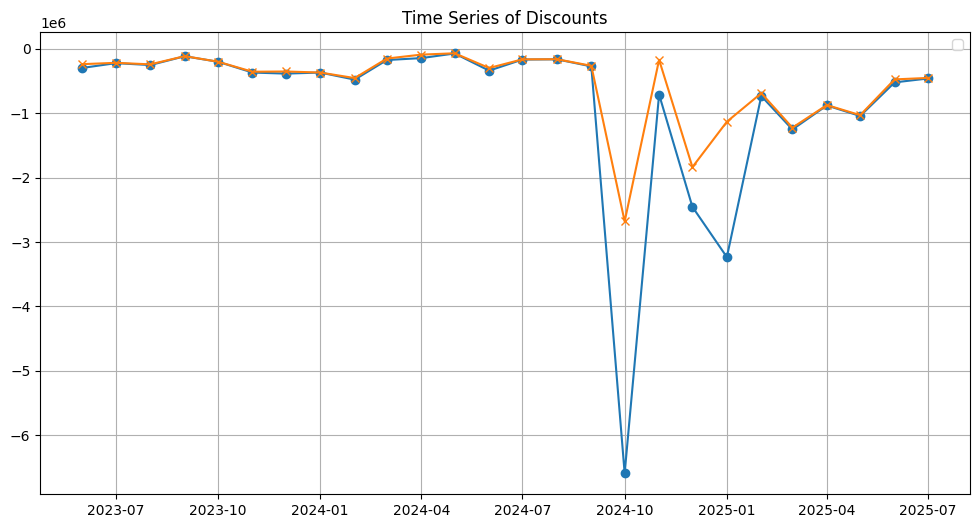

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_agg_df['Date'],
    (monthly_agg_df['Discounts']),
    marker='o'
)

plt.plot(
    mom_time_series_df['Month'],
    (mom_time_series_df['Discounts']),
    marker='x'
)

plt.title('Time Series of Discounts')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-16-2111569981.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


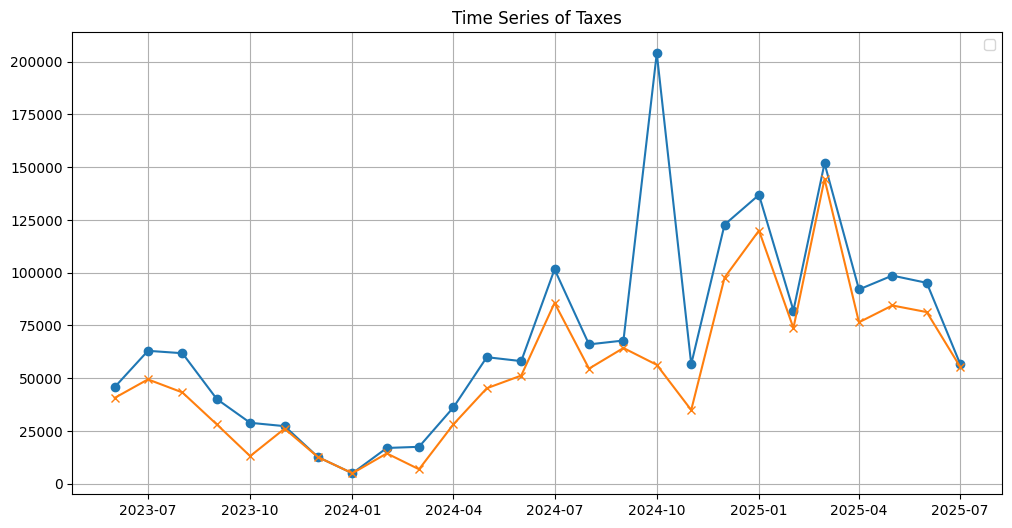

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_agg_df['Date'],
    (monthly_agg_df['Taxes']),
    marker='o'
)

plt.plot(
    mom_time_series_df['Month'],
    (mom_time_series_df['Taxes']),
    marker='x'
)

plt.title('Time Series of Taxes')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-17-3322631815.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


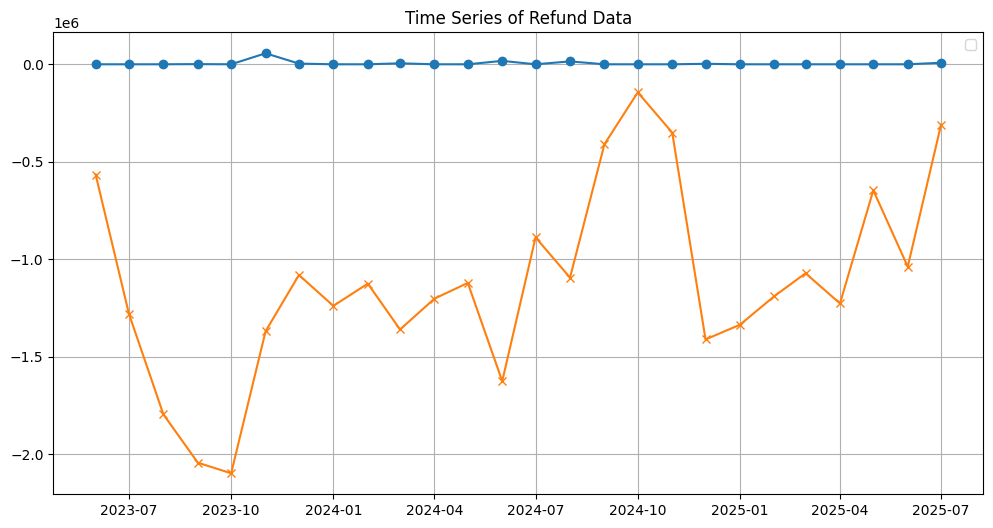

In [17]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_agg_df['Date'],
    (monthly_agg_df['Refunded Amount']),
    marker='o'
)

plt.plot(
    mom_time_series_df['Month'],
    (mom_time_series_df['Returns']),
    marker='x'
)

plt.title('Time Series of Refund Data')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-18-1907711567.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


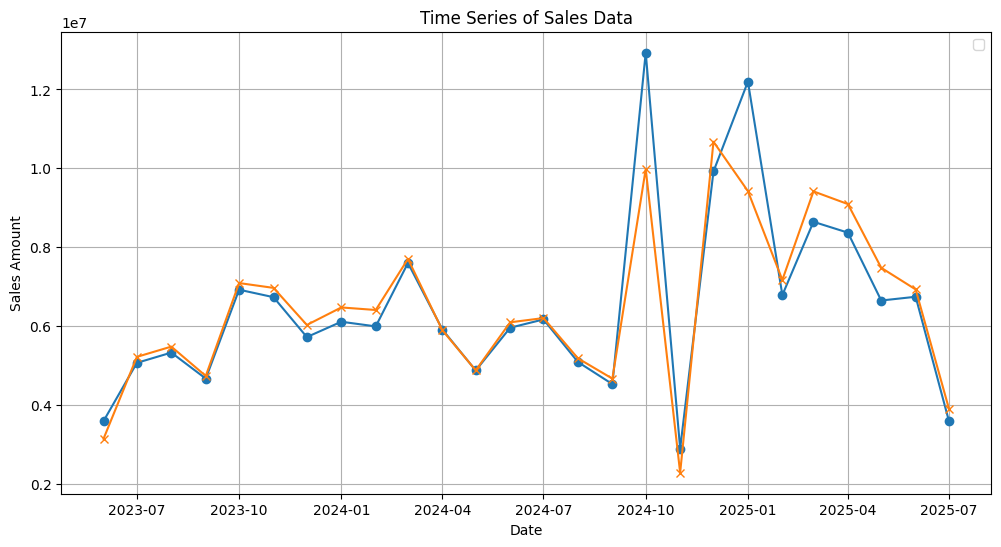

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_agg_df['Date'],
    (monthly_agg_df['Total']),
    marker='o'
)

plt.plot(
    mom_time_series_df['Month'],
    (mom_time_series_df['Gross sales']),
    marker='x'
)

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Time Series of Sales Data')
plt.legend()
plt.grid(True)
plt.show()

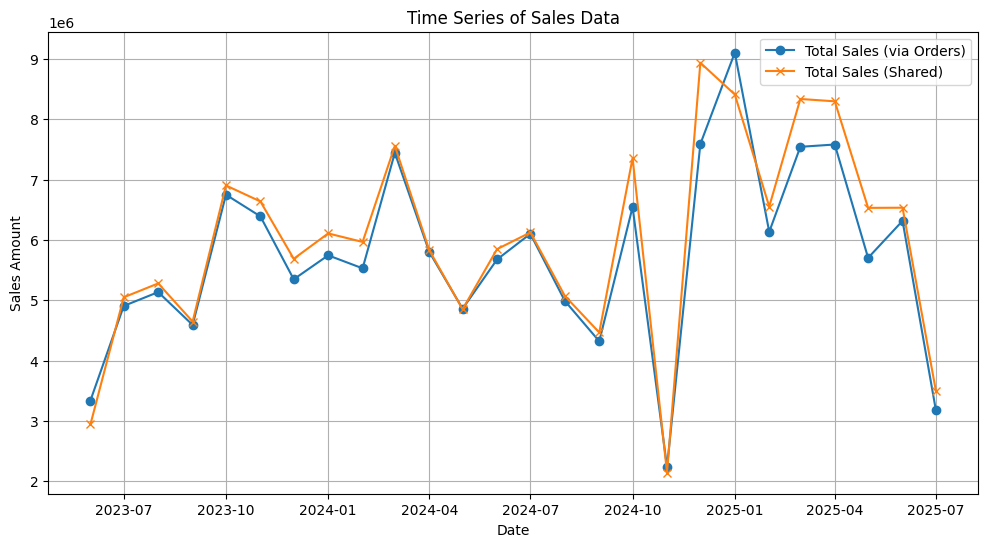

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(
    monthly_agg_df['Date'],
    (monthly_agg_df['Total'] + monthly_agg_df['Taxes'] + monthly_agg_df['Discounts']),
    label='Total Sales (via Orders)',
    marker='o'
)

plt.plot(
    mom_time_series_df['Month'],
    (mom_time_series_df['Gross sales'] + mom_time_series_df['Taxes'] + mom_time_series_df['Discounts']),
    label='Total Sales (Shared)',
    marker='x'
)

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Time Series of Sales Data')
plt.legend()
plt.grid(True)
plt.show()

# QC - FILTERED

In [20]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype                    
---  ------                       --------------  -----                    
 0   Name                         20426 non-null  object                   
 1   Financial Status             19737 non-null  object                   
 2   Paid at                      10400 non-null  object                   
 3   Fulfillment Status           19737 non-null  object                   
 4   Fulfilled at                 15065 non-null  object                   
 5   Accepts Marketing            19737 non-null  object                   
 6   Currency                     19737 non-null  object                   
 7   Subtotal                     19737 non-null  float64                  
 8   Shipping                     19737 non-null  float64                  
 9   Taxes                        19737 non-null  float

In [21]:
input_df.head()

Name Financial Status                    Paid at Fulfillment Status  \
0  OZK20741             paid  2025-07-17 13:42:55 +0530        unfulfilled   
1  OZK20740          pending                        NaN        unfulfilled   
2  OZK20739             paid  2025-07-17 11:02:26 +0530        unfulfilled   
3  OZK20738             paid  2025-07-17 01:00:41 +0530          fulfilled   
4  OZK20737          pending                        NaN          fulfilled   

                Fulfilled at Accepts Marketing Currency  Subtotal  Shipping  \
0                        NaN                no      INR    14,739         0   
1                        NaN                no      INR     9,224         0   
2                        NaN                no      INR    15,040         0   
3  2025-07-17 11:58:40 +0530                no      INR    18,464         0   
4  2025-07-17 12:35:01 +0530                no      INR     4,933         0   

   Taxes  Total                        Discount Code  Discount Amount  \
0      0 14,739              Razorpay offers(₹300.8)              301   
1  1,407  9,224                                  NaN                0   
2      0 15,040                                  NaN                0   
3      0 18,464  OZONENEW + Razorpay offers(₹376.82)            1,162   
4      0  4,933                                  NaN                0   

  Shipping Method                Created at  Lineitem quantity  \
0   Free Shipping 2025-07-17 13:42:53+05:30                  1   
1   Free Shipping 2025-07-17 12:07:47+05:30                  1   
2   Free Shipping 2025-07-17 11:02:23+05:30                  1   
3   Free Shipping 2025-07-17 01:00:40+05:30                  2   
4   Free Shipping 2025-07-16 21:35:03+05:30                  1   

                                                                                                                                                                                   Lineitem name  \
0  Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty - Black   
1                         Ozone 35 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 455W x 375D mm, Weight: 12.3kg, 2-Year Warranty - Black   
2  Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty - Black   
3                       Ozone 15.94 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 350W x 250D mm, Weight: 9.4kg, 2-Year Warranty - Black   
4               Ozone 16.11 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 350W x 250D mm, Weight: 9.5kg, 2-Year Warranty (Black) - Black   

   Lineitem price  Lineitem compare at price        Lineitem sku  \
0          15,040                        NaN        SAFILO BIO-2   
1           9,224                        NaN  Tusker-33NXT Black   
2          15,040                        NaN        SAFILO BIO-2   
3           9,813                        NaN   SAFILO DIGITAL-11   
4           4,933                        NaN         OES-BAS-NXT   

   Lineitem requires shipping  Lineitem taxable Lineitem fulfillment status  \
0                        True              True                     pending   
1                        True              True                     pending   
2                        True              True                     pending   
3                        True              True                   fulfilled   
4                        True              True                   fulfilled   

  Billing Province Billing Country Shipping Province Shipping Country  \
0               UP              IN                UP               IN   
1               KA  

In [22]:
mom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13946 entries, 0 to 13945
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product title             13946 non-null  object        
 1   Product type              13707 non-null  object        
 2   Product variant SKU       6499 non-null   object        
 3   Order name                13946 non-null  object        
 4   Order payment status      13946 non-null  object        
 5   Order fulfillment status  13946 non-null  object        
 6   Sales channel             13946 non-null  object        
 7   Order sales channel ID    13946 non-null  int64         
 8   Billing city              13798 non-null  object        
 9   Billing region            13808 non-null  object        
 10  Is canceled order         13946 non-null  bool          
 11  Month                     13946 non-null  datetime64[ns]
 12  Net items sold    

In [23]:
mom_df.head()

Product title  \
0               Ozone 34.94 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 455W x 375D mm, Weight: 12.4kg, 2-Year Warranty   
1  Ozone 78 Litres Anti-burglary Safe Locker for Factories & Warehouses – Manual Lock, 1-Way Unlocking (Manual Key), Size: 555H x 460W x 360D mm, Weight: 64.3kg, 2-Year Warranty   
2                                                                                                                                                        Ozone WDB Video Doorbell   
3                  Ozone 9.2 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 200H x 350W x 200D mm, Weight: 5.9kg, 2-Year Warranty   
4                 Ozone 2.28 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 60H x 190W x 275D mm, Weight: 1.75kg, 2-Year Warranty   

                         Product type Product variant SKU Order name  \
0                for-home, for-office        Tusker - NXT    OZK7165   
1  for-home, for-office, for-industry                 NaN    OZK7008   
2                       smart-devices      OZ-Life-WDB-01    OZK6991   
3     for-home, for-office, for-hotel                 NaN    OZK7245   
4                for-home, for-office                 NaN    OZK7200   

  Order payment status Order fulfillment status                Sales channel  \
0                 paid                fulfilled                 Draft Orders   
1                 paid                fulfilled                 Draft Orders   
2               voided              unfulfilled                       Gokwik   
3              pending                fulfilled  rhampage next.js connection   
4                 paid                fulfilled  rhampage next.js connection   

   Order sales channel ID Billing city  Billing region  Is canceled order  \
0                 1354745      Gurgaon         Haryana              False   
1                 1354745        Delhi           Delhi              False   
2             22545498113        THANE     Maharashtra               True   
3             44356173825      Sadlpur       Karnataka              False   
4             44356173825      Gwalior  Madhya Pradesh              False   

       Month  Net items sold  Gross sales  Discounts  Returns  Net sales  \
0 2023-06-01               1        9,592       -839        0      8,753   
1 2023-06-01               1       31,990    -10,328        0     21,662   
2 2023-06-01               0       11,998          0  -11,998          0   
3 2023-06-01               1        4,915          0        0      4,915   
4 2023-06-01               1        3,843          0        0      3,843   

   Taxes  Total sales  
0      0        8,753  
1      0       21,662  
2      0            0  
3    885        5,800  
4      0        3,843

In [24]:
(input_df['Total'] < 0).any()

np.False_

In [25]:
(input_df['Total'] == 0).count()

np.int64(20426)

In [26]:
input_df['Fulfillment Status'].value_counts()

Fulfillment Status
fulfilled      15065
unfulfilled     4580
restocked         91
partial            1
Name: count, dtype: int64

In [27]:
input_df['Financial Status'].value_counts()

Financial Status
paid                  10346
pending                4949
voided                 4384
refunded                 40
partially_paid           17
partially_refunded        1
Name: count, dtype: int64

In [28]:
(mom_df['Gross sales'] < 0).any()

np.False_

In [29]:
(mom_df['Net sales'] < 0).any()

np.True_

In [30]:
mom_df['Is canceled order'].value_counts()

Is canceled order
False    10828
True      3118
Name: count, dtype: int64

In [31]:
mom_df['Gross sales'].sum()

np.float64(168431066.41)

In [32]:
mom_df['Net sales'].sum()

np.float64(125135507.66999999)

In [33]:
input_df['Created at'] = pd.to_datetime(input_df['Created at'])

In [34]:
input_df = input_df[input_df['Created at'] >= '2023-06-01'].copy()

In [35]:
input_df['Total'].sum()

np.float64(168906862.5)

In [36]:
time_series_df = input_df.groupby(input_df['Created at'].dt.date).agg({
    'Discount Amount': 'sum',
    'Subtotal': 'sum',
    'Total': 'sum',
    'Taxes': 'sum',
    'Refunded Amount': 'sum',
}).reset_index()

In [37]:
time_series_df.rename(columns={'Created at': 'Date'}, inplace=True)
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])
time_series_df = time_series_df.sort_values('Date')
time_series_df.head()

Date  Discount Amount  Subtotal   Total  Taxes  Refunded Amount
0 2023-06-01            1,677   375,439 375,439      0                0
1 2023-06-02            4,504   103,515 103,515      0                0
2 2023-06-03            2,982    18,812  18,812  1,714                0
3 2023-06-05           13,879    39,229  39,229      0                0
4 2023-06-06              142    48,761  48,761      0                0

In [38]:
mom_df['Month'] = pd.to_datetime(mom_df['Month'])
mom_time_series_df = mom_df.groupby('Month').agg({
    'Gross sales': 'sum',
    'Discounts': 'sum',
    'Returns': 'sum',
    'Net sales': 'sum',
    'Taxes': 'sum',
    'Total sales': 'sum'
}).reset_index()

In [39]:
mom_time_series_df = mom_time_series_df.sort_values('Month')
mom_time_series_df.head()

Month  Gross sales  Discounts    Returns  Net sales  Taxes  Total sales
0 2023-06-01    3,139,053   -237,535   -565,284  2,336,233 40,659    2,376,892
1 2023-07-01    5,215,836   -216,647 -1,279,640  3,719,548 49,448    3,768,996
2 2023-08-01    5,475,876   -240,768 -1,795,164  3,439,944 43,262    3,483,205
3 2023-09-01    4,731,508   -113,237 -2,042,815  2,575,455 28,096    2,603,552
4 2023-10-01    7,087,968   -199,730 -2,097,041  4,791,197 13,080    4,804,277

In [40]:
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])

monthly_agg_df = time_series_df.groupby(pd.Grouper(key='Date', freq='M')).agg({
    'Discount Amount': 'sum',
    'Subtotal': 'sum',
    'Total': 'sum',
    'Taxes': 'sum',
    'Refunded Amount': 'sum',
}).reset_index()

monthly_agg_df['Date'] = monthly_agg_df['Date'].dt.to_period('M').dt.start_time
monthly_agg_df.head()

/tmp/ipython-input-40-1124575462.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_agg_df = time_series_df.groupby(pd.Grouper(key='Date', freq='M')).agg({


Date  Discount Amount  Subtotal     Total  Taxes  Refunded Amount
0 2023-06-01          295,884 3,588,030 3,588,030 45,749                0
1 2023-07-01          221,772 5,064,007 5,064,007 62,994                0
2 2023-08-01          251,589 5,324,379 5,324,379 61,852                0
3 2023-09-01          114,812 4,664,962 4,664,962 40,114              856
4 2023-10-01          200,378 6,919,439 6,919,439 28,873                0

In [41]:
monthly_agg_df['Discounts'] = -1 * monthly_agg_df['Discount Amount']
monthly_agg_df['Discounts']

0      -295,884
1      -221,772
2      -251,589
3      -114,812
4      -200,378
5      -367,997
6      -384,253
7      -367,958
8      -477,734
9      -173,336
10     -143,478
11      -71,698
12     -338,169
13     -166,103
14     -162,235
15     -272,623
16   -6,590,407
17     -708,742
18   -2,453,832
19   -3,233,599
20     -732,472
21   -1,251,985
22     -878,908
23   -1,042,268
24     -520,712
25     -459,956
Name: Discounts, dtype: float64

In [42]:
mom_time_series_df.describe()

Month  Gross sales  Discounts    Returns  \
count                             26           26         26         26   
mean   2024-06-16 02:46:09.230769152    6,478,118   -549,416 -1,115,797   
min              2023-06-01 00:00:00    2,277,072 -2,679,360 -2,097,041   
25%              2023-12-08 18:00:00    5,187,733   -634,860 -1,353,717   
50%              2024-06-16 00:00:00    6,302,374   -324,455 -1,156,641   
75%              2024-12-24 06:00:00    7,397,941   -177,368   -925,087   
max              2025-07-01 00:00:00   10,673,256    -68,616   -143,935   
std                              NaN    2,070,618    609,313    495,305   

       Net sales   Taxes  Total sales  
count         26      26           26  
mean   4,812,904  53,605    4,866,509  
min    1,756,832   4,949    1,791,759  
25%    3,770,509  28,115    3,821,232  
50%    4,808,812  50,354    4,822,539  
75%    5,703,056  75,828    5,786,757  
max    7,426,454 144,447    7,524,144  
std    1,553,751  34,984    1,571,802

In [43]:
monthly_agg_df.describe()

Date  Discount Amount   Subtotal      Total  \
count                             26               26         26         26   
mean   2024-06-16 02:46:09.230769152          841,650  6,494,688  6,496,418   
min              2023-06-01 00:00:00           71,698  2,889,800  2,889,800   
25%              2023-12-08 18:00:00          205,727  5,069,448  5,069,448   
50%              2024-06-16 00:00:00          367,978  6,041,570  6,047,872   
75%              2024-12-24 06:00:00          726,539  6,883,572  6,885,342   
max              2025-07-01 00:00:00        6,590,407 12,930,762 12,930,762   
std                              NaN        1,380,426  2,385,851  2,386,226   

        Taxes  Refunded Amount  Discounts  
count      26               26         26  
mean   69,455            4,164   -841,650  
min     4,949                0 -6,590,407  
25%    37,185                0   -726,539  
50%    60,914                0   -367,978  
75%    94,425            2,096   -205,727  
max   204,012           56,431    -71,698  
std    46,888           11,596  1,380,426

# QC - OVERLAP

In [21]:
input_df_cleaned = input_df.dropna(subset=['Total']).copy()

In [23]:
duplicates_input_df = input_df_cleaned[input_df_cleaned.duplicated(subset=['Name'], keep=False)]
display(duplicates_input_df.sort_values('Name'))

Empty DataFrame
Columns: [Name, Financial Status, Paid at, Fulfillment Status, Fulfilled at, Accepts Marketing, Currency, Subtotal, Shipping, Taxes, Total, Discount Code, Discount Amount, Shipping Method, Created at, Lineitem quantity, Lineitem name, Lineitem price, Lineitem compare at price, Lineitem sku, Lineitem requires shipping, Lineitem taxable, Lineitem fulfillment status, Billing Province, Billing Country, Shipping Province, Shipping Country, Cancelled at, Payment Method, Refunded Amount, Vendor, Outstanding Balance, Device ID, Id, Risk Level, Source, Lineitem discount, Tax 1 Name, Tax 1 Value, Tax 2 Name, Tax 2 Value, Tax 3 Name, Tax 3 Value, Tax 4 Name, Tax 4 Value, Tax 5 Name, Tax 5 Value, Duties, Billing Province Name, Shipping Province Name, Payment Terms Name, Next Payment Due At]
Index: []

In [24]:
duplicates_mom_df = mom_df[mom_df.duplicated(subset=['Order name'], keep=False)]
display(duplicates_mom_df.sort_values('Order name'))

Product title  \
3453                                                                                          Ozone Biometric Safe for Homes & Offices | 3-way Access | Fingerprint, Password & Emergency Key (40 Ltrs.)   
3199                                                                                          Ozone Biometric Safe for Homes & Offices | 3-way Access | Fingerprint, Password & Emergency Key (40 Ltrs.)   
2846                                        Ozone 5.28 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 80H x 280W x 350D mm, Weight: 3kg, 2-Year Warranty   
2731                                                                                                                                                       Ozone Sekure- 11 | Digital Safe | 15.9 Litres   
3079                                                                                          Ozone Biometric Safe for Homes & Offices | 3-way Access | Fingerprint, Password & Emergency Key (40 Ltrs.)   
2878                                                                                                                                                                                Ozone 16A Smart Plug   
2803                                                                                                                                                       Ozone Sekure- 11 | Digital Safe | 15.9 Litres   
3600                                                                                          Ozone Biometric Safe for Homes & Offices | 3-way Access | Fingerprint, Password & Emergency Key (40 Ltrs.)   
2726                                                                                          Ozone Biometric Safe for Homes & Offices | 3-way Access | Fingerprint, Password & Emergency Key (40 Ltrs.)   
3371               Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty   
3113               Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty   
2896                                     Ozone 2.28 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 60H x 190W x 275D mm, Weight: 1.75kg, 2-Year Warranty   
3214                                     Ozone 2.28 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 60H x 190W x 275D mm, Weight: 1.75kg, 2-Year Warranty   
2712                                                                                           Ozone Economical Wi-Fi Smart Door Lock 2 with 4-way access | Door Thickness: 35-80 mm | Free Installation   
3605                                                                                           Ozone Economical Wi-Fi Smart Door Lock 2 with 4-way access | Door Thickness: 35-80 mm | Free Installation   
3078                                                                                                                                                       Ozone Sekure- 11 | Digital Safe | 15.9 Litres   
3264                                                                                                                                                       Ozone Sekure- 11 | Digital Safe | 15.9 Litres   
3483                                                                                                           Ozone Morphy Plus Bluetooth Smart Door Lock with 4-way access | Door Thickness: 35-100 mm   
3245                                      Ozone 26.3 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 200H x 430W x 380D mm, Weight: 11kg, 2-Year Warranty   
3595                                                                                                    Ozo

In [25]:
input_df.head()

Name Financial Status                    Paid at Fulfillment Status  \
0  OZK20741             paid  2025-07-17 13:42:55 +0530        unfulfilled   
1  OZK20740          pending                        NaN        unfulfilled   
2  OZK20739             paid  2025-07-17 11:02:26 +0530        unfulfilled   
3  OZK20738             paid  2025-07-17 01:00:41 +0530          fulfilled   
4  OZK20737          pending                        NaN          fulfilled   

                Fulfilled at Accepts Marketing Currency  Subtotal  Shipping  \
0                        NaN                no      INR    14,739         0   
1                        NaN                no      INR     9,224         0   
2                        NaN                no      INR    15,040         0   
3  2025-07-17 11:58:40 +0530                no      INR    18,464         0   
4  2025-07-17 12:35:01 +0530                no      INR     4,933         0   

   Taxes  Total                        Discount Code  Discount Amount  \
0      0 14,739              Razorpay offers(₹300.8)              301   
1  1,407  9,224                                  NaN                0   
2      0 15,040                                  NaN                0   
3      0 18,464  OZONENEW + Razorpay offers(₹376.82)            1,162   
4      0  4,933                                  NaN                0   

  Shipping Method                Created at  Lineitem quantity  \
0   Free Shipping 2025-07-17 13:42:53+05:30                  1   
1   Free Shipping 2025-07-17 12:07:47+05:30                  1   
2   Free Shipping 2025-07-17 11:02:23+05:30                  1   
3   Free Shipping 2025-07-17 01:00:40+05:30                  2   
4   Free Shipping 2025-07-16 21:35:03+05:30                  1   

                                                                                                                                                                                   Lineitem name  \
0  Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty - Black   
1                         Ozone 35 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 455W x 375D mm, Weight: 12.3kg, 2-Year Warranty - Black   
2  Ozone 55 Litres Fingerprint Safe Locker for Home & Office – Fingerprint Lock, 2-in-1 Unlocking (Fingerprint & Password), Size: 555H x 350W x 360D mm, Weight: 24.7kg, 2-Year Warranty - Black   
3                       Ozone 15.94 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 350W x 250D mm, Weight: 9.4kg, 2-Year Warranty - Black   
4               Ozone 16.11 Litres Digital Safe Locker for Home & Office – Digital Lock, 1-Way Unlocking (Password), Size: 250H x 350W x 250D mm, Weight: 9.5kg, 2-Year Warranty (Black) - Black   

   Lineitem price  Lineitem compare at price        Lineitem sku  \
0          15,040                        NaN        SAFILO BIO-2   
1           9,224                        NaN  Tusker-33NXT Black   
2          15,040                        NaN        SAFILO BIO-2   
3           9,813                        NaN   SAFILO DIGITAL-11   
4           4,933                        NaN         OES-BAS-NXT   

   Lineitem requires shipping  Lineitem taxable Lineitem fulfillment status  \
0                        True              True                     pending   
1                        True              True                     pending   
2                        True              True                     pending   
3                        True              True                   fulfilled   
4                        True              True                   fulfilled   

  Billing Province Billing Country Shipping Province Shipping Country  \
0               UP              IN                UP               IN   
1               KA  

In [26]:
input_df['Created at'].min()

Timestamp('2021-07-05 15:47:29+0530', tz='UTC+05:30')

In [27]:
mom_df['Month'].min()

Timestamp('2023-06-01 00:00:00')

In [29]:
truncated_input_df = input_df[input_df['Created at'] >= '2023-06-01'].copy()
truncated_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14249 entries, 0 to 14248
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype                    
---  ------                       --------------  -----                    
 0   Name                         14249 non-null  object                   
 1   Financial Status             13772 non-null  object                   
 2   Paid at                      8962 non-null   object                   
 3   Fulfillment Status           13772 non-null  object                   
 4   Fulfilled at                 10788 non-null  object                   
 5   Accepts Marketing            13772 non-null  object                   
 6   Currency                     13772 non-null  object                   
 7   Subtotal                     13772 non-null  float64                  
 8   Shipping                     13772 non-null  float64                  
 9   Taxes                        13772 non-null  float64   

In [30]:
mom_orders = set(mom_df['Order name'].dropna())
input_orders = set(truncated_input_df['Name'].dropna())

mom_orders_size = len(mom_orders)
input_orders_size = len(input_orders)
overlap_size = len(mom_orders.intersection(input_orders))

print(f"Mom Orders: {mom_orders_size}")
print(f"Input Orders: {input_orders_size}")
print(f"Overlap: {overlap_size}")

Mom Orders: 13378
Input Orders: 13772
Overlap: 13378


In [31]:
input_only_orders = input_orders - mom_orders
input_only_size = len(input_only_orders)
input_only_size

394

In [32]:
mom_orders_only = mom_orders - input_orders
mom_orders_only_size = len(mom_orders_only)
mom_orders_only_size

0

In [33]:
input_only_orders

{'OZK10083',
 'OZK10373',
 'OZK11333',
 'OZK11335',
 'OZK11424',
 'OZK12283',
 'OZK12359',
 'OZK12622',
 'OZK12707',
 'OZK12830',
 'OZK12900',
 'OZK12902',
 'OZK13129',
 'OZK13260',
 'OZK13857',
 'OZK13906',
 'OZK14123',
 'OZK14501',
 'OZK14877',
 'OZK15068',
 'OZK15230',
 'OZK15264',
 'OZK15357',
 'OZK15479',
 'OZK15481',
 'OZK15482',
 'OZK15483',
 'OZK15484',
 'OZK15485',
 'OZK15486',
 'OZK15487',
 'OZK15488',
 'OZK15489',
 'OZK15490',
 'OZK15491',
 'OZK15492',
 'OZK15493',
 'OZK15494',
 'OZK15495',
 'OZK15496',
 'OZK15497',
 'OZK15498',
 'OZK15499',
 'OZK15500',
 'OZK15501',
 'OZK15502',
 'OZK15503',
 'OZK15504',
 'OZK15505',
 'OZK15506',
 'OZK15507',
 'OZK15508',
 'OZK15509',
 'OZK15510',
 'OZK15513',
 'OZK15514',
 'OZK15515',
 'OZK15516',
 'OZK15517',
 'OZK15518',
 'OZK15519',
 'OZK15520',
 'OZK15521',
 'OZK15522',
 'OZK15523',
 'OZK15524',
 'OZK15525',
 'OZK15526',
 'OZK15527',
 'OZK15528',
 'OZK15529',
 'OZK15530',
 'OZK15531',
 'OZK15532',
 'OZK15533',
 'OZK15534',
 'OZK15535',

In [45]:
excluded_df = truncated_input_df[truncated_input_df['Name'].isin(input_only_orders)]
excluded_df

Name    Financial Status                    Paid at  \
0      OZK20741                paid  2025-07-17 13:42:55 +0530   
1      OZK20740             pending                        NaN   
2      OZK20739                paid  2025-07-17 11:02:26 +0530   
3      OZK20738                paid  2025-07-17 01:00:41 +0530   
135    OZK20610                paid  2025-07-11 14:35:26 +0530   
335    OZK20412                paid  2025-06-28 14:30:14 +0530   
478    OZK20270                paid  2025-06-20 11:53:43 +0530   
479    OZK20270                 NaN                        NaN   
508    OZK20241                paid  2025-06-18 18:16:16 +0530   
535    OZK20216                paid  2025-06-17 11:41:56 +0530   
536    OZK20216                 NaN                        NaN   
537    OZK20216                 NaN                        NaN   
554    OZK20199                paid  2025-06-16 15:36:33 +0530   
588    OZK20165                paid  2025-06-13 16:53:17 +0530   
758    OZK20003                paid  2025-06-06 15:29:43 +0530   
759    OZK20003                 NaN                        NaN   
1002   OZK19771                paid  2025-05-28 11:25:11 +0530   
1019   OZK19754                paid  2025-05-27 12:45:15 +0530   
1130   OZK19643                paid  2025-05-21 10:29:36 +0530   
1143   OZK19630                paid  2025-05-20 12:55:13 +0530   
1237   OZK19541                paid  2025-05-15 17:02:58 +0530   
1264   OZK19514                paid  2025-05-15 11:02:20 +0530   
1345   OZK19433                paid  2025-05-09 13:13:33 +0530   
1724   OZK19070                paid  2025-04-21 15:10:20 +0530   
1806   OZK18989                paid  2025-04-17 10:35:37 +0530   
1938   OZK18869                paid  2025-04-10 18:07:53 +0530   
1996   OZK18815                paid  2025-04-08 14:07:12 +0530   
2193   OZK18630                paid  2025-04-01 12:39:55 +0530   
2271   OZK18552                paid  2025-03-29 15:15:07 +0530   
2677   OZK18157                paid  2025-03-17 14:44:53 +0530   
2679   OZK18155                paid  2025-03-17 12:34:50 +0530   
2680   OZK18155                 NaN                        NaN   
2681   OZK18155                 NaN                        NaN   
2682   OZK18155                 NaN                        NaN   
2683   OZK18155                 NaN                        NaN   
2684   OZK18155                 NaN                        NaN   
2727   OZK18112                paid  2025-03-13 09:58:20 +0530   
2769   OZK18074                paid  2025-03-12 13:10:22 +0530   
2777   OZK18066                paid  2025-03-10 12:19:22 +0530   
2803   OZK18041                paid  2025-03-17 19:08:15 +0530   
2849   OZK17996                paid  2025-03-06 12:44:02 +0530   
2871   OZK17977                paid  2025-03-08 13:31:52 +0530   
2893   OZK17956                paid  2025-03-08 19:21:14 +0530   
2946   OZK17903                paid  2025-02-28 17:38:16 +0530   
2947   OZK17903                 NaN                        NaN   
2948   OZK17902                paid  2025-02-28 17:37:27 +0530   
2972   OZK17881                paid  2025-02-27 17:19:24 +0530   
2975   OZK17878                paid  2025-02-27 15:27:13 +0530   
3025   OZK17830                paid  2025-02-24 15:38:43 +0530   
3058   OZK17797                paid  2025-02-26 19:10:06 +0530   
3060   OZK17795                paid  2025-02-22 12:04:20 +0530   
3068   OZK17787                paid  2025-02-21 17:34:41 +0530   
3071   OZK17784                paid  2025-02-25 01:40:10 +0530   
3074   OZK17781                paid  2025-02-21 12:29:47 +0530   
3075   OZK17781                 NaN                        NaN   
3146   OZK17710                paid  2025-02-18 13:14:08 +0530   
3156   OZK17700                paid  2025-02-20 18:41:34 +0530   
3260   OZK17597                paid  2025-02-11 16:32:36 +0530   
3295   OZK17563                paid  2025-02-08 14:18:33 +0530   
3573   OZK17293                paid  2025-01-24 17:

In [46]:
len(excluded_df)

424

In [51]:
display(truncated_input_df[truncated_input_df['Created at'].dt.date == pd.to_datetime('2023-06-01').date()])

Name Financial Status Paid at Fulfillment Status  \
14225  OZK6990          pending     NaN          fulfilled   
14226  OZK6989          pending     NaN          fulfilled   
14227  OZK6988          pending     NaN          fulfilled   
14228  OZK6987           voided     NaN        unfulfilled   
14229  OZK6986           voided     NaN        unfulfilled   
14230  OZK6985           voided     NaN        unfulfilled   
14231  OZK6984           voided     NaN        unfulfilled   
14232  OZK6983           voided     NaN        unfulfilled   
14233  OZK6982          pending     NaN          fulfilled   
14234  OZK6981          pending     NaN          fulfilled   
14235  OZK6980          pending     NaN          fulfilled   
14236  OZK6979          pending     NaN          fulfilled   
14237  OZK6978          pending     NaN          fulfilled   
14238  OZK6977          pending     NaN          fulfilled   
14239  OZK6976          pending     NaN          fulfilled   
14240  OZK6975          pending     NaN          fulfilled   
14241  OZK6974           voided     NaN        unfulfilled   
14242  OZK6973          pending     NaN          fulfilled   
14243  OZK6972           voided     NaN        unfulfilled   
14244  OZK6971           voided     NaN        unfulfilled   
14245  OZK6970          pending     NaN          fulfilled   
14246  OZK6969           voided     NaN        unfulfilled   
14247  OZK6968          pending     NaN          fulfilled   
14248  OZK6967          pending     NaN          fulfilled   

                    Fulfilled at Accepts Marketing Currency  Subtotal  \
14225  2023-06-02 11:57:33 +0530                no      INR    10,942   
14226  2023-06-02 11:56:38 +0530                no      INR    10,942   
14227  2023-06-02 11:55:28 +0530                no      INR    10,942   
14228                        NaN               yes      INR    10,942   
14229                        NaN                no      INR     8,792   
14230                        NaN                no      INR   109,420   
14231                        NaN               yes      INR     8,800   
14232                        NaN               yes      INR     8,800   
14233  2023-06-02 11:53:47 +0530                no      INR     5,200   
14234  2023-06-02 10:31:36 +0530                no      INR    21,884   
14235  2023-06-03 10:18:02 +0530               yes      INR    19,176   
14236  2023-06-03 10:16:59 +0530                no      INR     4,392   
14237  2023-06-02 10:29:49 +0530                no      INR    15,832   
14238  2023-06-02 10:28:26 +0530               yes      INR    10,942   
14239  2023-06-02 11:51:48 +0530               yes      INR    17,592   
14240  2023-06-03 10:14:30 +0530                no      INR    17,400   
14241                        NaN                no      INR     5,008   
14242  2023-06-05 10:57:40 +0530               yes      INR    17,499   
14243                        NaN                no      INR    17,499   
14244                        NaN                no      INR    10,942   
14245  2023-06-02 10:25:53 +0530                no      INR     1,912   
14246                        NaN                no      INR    12,359   
14247  2023-06-02 10:24:57 +0530                no      INR     5,383   
14248  2023-06-01 11:25:43 +0530                no      INR    12,839   

       Shipping  Taxes   Total    Discount Code  Discount Amount  \
14225         0      0  10,942              NaN                0   
14226         0      0  10,942              NaN                0   
14227         0      0  10,942              NaN                0   
14228         0      0  10,942              NaN                0   
14229         0      0   8,792              NaN                0   
14230         0      0 109,420              NaN                0   
14231         0      0   8,800              NaN                0   
14232         0      0   8,800              NaN                0   
14233         0      

In [53]:
custom_df = truncated_input_df[~truncated_input_df['Name'].isin(input_only_orders)].copy()
len(custom_df)

13825

In [54]:
display(custom_df[custom_df['Created at'].dt.date == pd.to_datetime('2023-06-01').date()])

Empty DataFrame
Columns: [Name, Financial Status, Paid at, Fulfillment Status, Fulfilled at, Accepts Marketing, Currency, Subtotal, Shipping, Taxes, Total, Discount Code, Discount Amount, Shipping Method, Created at, Lineitem quantity, Lineitem name, Lineitem price, Lineitem compare at price, Lineitem sku, Lineitem requires shipping, Lineitem taxable, Lineitem fulfillment status, Billing Province, Billing Country, Shipping Province, Shipping Country, Cancelled at, Payment Method, Refunded Amount, Vendor, Outstanding Balance, Device ID, Id, Risk Level, Source, Lineitem discount, Tax 1 Name, Tax 1 Value, Tax 2 Name, Tax 2 Value, Tax 3 Name, Tax 3 Value, Tax 4 Name, Tax 4 Value, Tax 5 Name, Tax 5 Value, Duties, Billing Province Name, Shipping Province Name, Payment Terms Name, Next Payment Due At]
Index: []

# RE-PLOT

In [39]:
custom_df['Created at'] = pd.to_datetime(custom_df['Created at'])

time_series_custom_df = custom_df.groupby(custom_df['Created at'].dt.date).agg({
    'Discount Amount': 'sum',
    'Total': 'sum',
    'Taxes': 'sum',
    'Refunded Amount': 'sum',
}).reset_index()

time_series_custom_df.rename(columns={'Created at': 'Date'}, inplace=True)

time_series_custom_df['Date'] = pd.to_datetime(time_series_custom_df['Date'])

time_series_custom_df = time_series_custom_df.sort_values('Date')

time_series_custom_df.head()

Date  Discount Amount   Total  Taxes  Refunded Amount
0 2023-06-02            4,504 103,515      0                0
1 2023-06-03            2,982  18,812  1,714                0
2 2023-06-05           13,879  39,229      0                0
3 2023-06-06              142  38,527      0                0
4 2023-06-07                0   5,999    915                0